<a href="https://colab.research.google.com/github/antonioravila/Analise-de-dados/blob/main/VideoGame_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - Video Game Sales (Ubisoft)

(depois de pronto o projeto, escrever uma introdução aqui)

#Dados Gerais

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
# Carregando o dataset
dataset = pd.read_csv("/content/vgsales.csv")

In [ ]:
# Visualizando as 5 primeiras colunas no dataset
dataset.head()

,Ranking_vendasGerais,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japão,outras_vendas,vendas_Globais
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Visualizando as 5 ultimas colunas no dataset
dataset.tail()

,Ranking_vendasGerais,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japão,outras_vendas,vendas_Globais
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
# Mudando as colunas para o português
dataset.columns = ["Ranking_vendasGerais", "Nome", "Plataforma", "Ano", 
"Genero", "Editora", "vendas_America_do_Norte", "vendas_Europa", "vendas_Japão", 
"outras_vendas", "vendas_Globais"]

dataset.head(2)

,Ranking_vendasGerais,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japão,outras_vendas,vendas_Globais
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
# Visualisando as descrições estatísticas do dataset
dataset.describe()

,Ranking_vendasGerais,Ano,vendas_America_do_Norte,vendas_Europa,vendas_Japão,outras_vendas,vendas_Globais
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


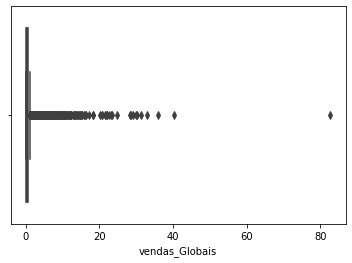

In [ ]:
# o gráfico mostra a distribuição, mas sua visualização fica ruim, portanto vou tirar o wii sports, que destoa demais do resto
distribuicao_vendas_globais = sns.boxplot(dataset['vendas_Globais'],)

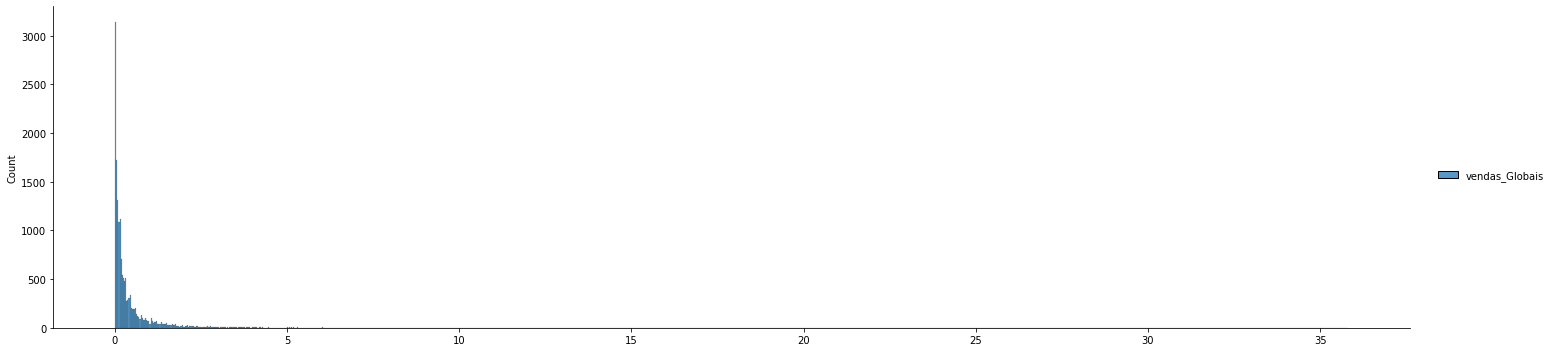

In [ ]:

teste = sns.displot(data = dataset['vendas_Globais'].to_frame().query('vendas_Globais<=40'), aspect = 4)

#Dados Editoras

In [ ]:
# Separando as vendas globais por editora, e depois transformando em um dataset
por_editora = dataset.groupby('Editora')
vendasPor_editora = por_editora['vendas_Globais'].sum().sort_values(ascending=False).head(15)

vendasPor_editora = pd.DataFrame(vendasPor_editora)
vendasPor_editora = vendasPor_editora.reset_index()
vendasPor_editora

,Editora,vendas_Globais
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


Text(0.5, 0.98, 'Vendas por editoras')

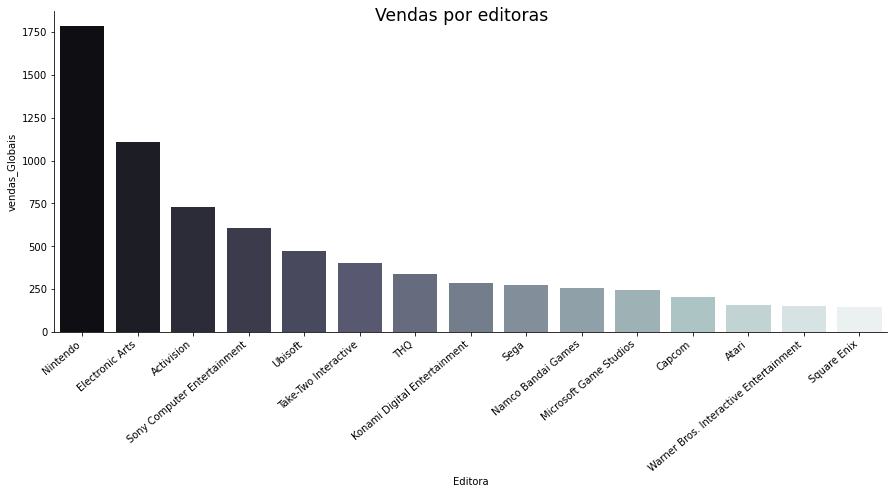

In [ ]:
# Plotando um gráfico que demonstra as vendas globais das 10 editoras que mais vendem
grafico_vendasGlobais_porEditora = sns.catplot(
    data = vendasPor_editora,
    x = 'Editora', 
    y = 'vendas_Globais',
    kind = 'bar',
    palette = 'bone',
    aspect = 2.5    
)

grafico_vendasGlobais_porEditora.set_xticklabels(rotation = 40, horizontalalignment='right')
grafico_vendasGlobais_porEditora.fig.suptitle('Vendas por editoras', fontsize = 'xx-large')

In [ ]:
vendasPor_editora.mean()

vendas_Globais    477.370667
dtype: float64

In [ ]:
vendasPor_editora.median()

vendas_Globais    283.64
dtype: float64

In [ ]:
por_ano = dataset.groupby('Ano')
vendas_por_ano = por_ano['vendas_Globais'].sum()

vendas_por_ano = pd.DataFrame(vendas_por_ano)
vendas_por_ano = vendas_por_ano.reset_index()
vendas_por_ano.head(5)

,Ano,vendas_Globais
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


#Variações Anuais

Text(0.5, 0.98, 'Vendas globais ao longo dos anos')

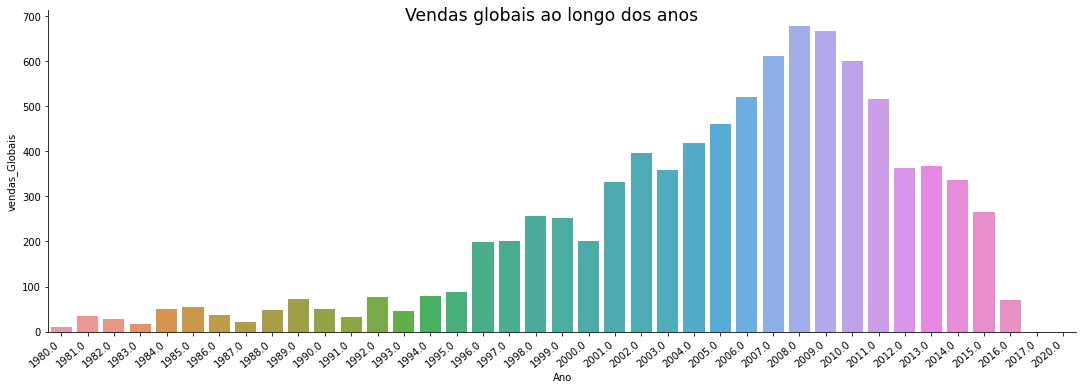

In [ ]:
gráfico_vendasGlobais_porAno = sns.catplot(
    data = vendas_por_ano,
    x = 'Ano', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3    
)

gráfico_vendasGlobais_porAno.set_xticklabels(rotation = 40, horizontalalignment='right')
gráfico_vendasGlobais_porAno.fig.suptitle('Vendas globais ao longo dos anos', fontsize = 'xx-large')

#Considerações Finais